In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("clean_data_studentperformance.csv")

In [3]:
data

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,female,group B,bachelor's degree,standard,0,72,72,74,218
1,1,female,group C,some college,standard,1,69,90,88,247
2,2,female,group B,master's degree,standard,0,90,95,93,278
3,3,male,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,male,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,1,88,99,95,282
996,996,male,group C,high school,free/reduced,0,62,55,55,172
997,997,female,group C,high school,free/reduced,1,59,71,65,195
998,998,female,group D,some college,standard,1,68,78,77,223


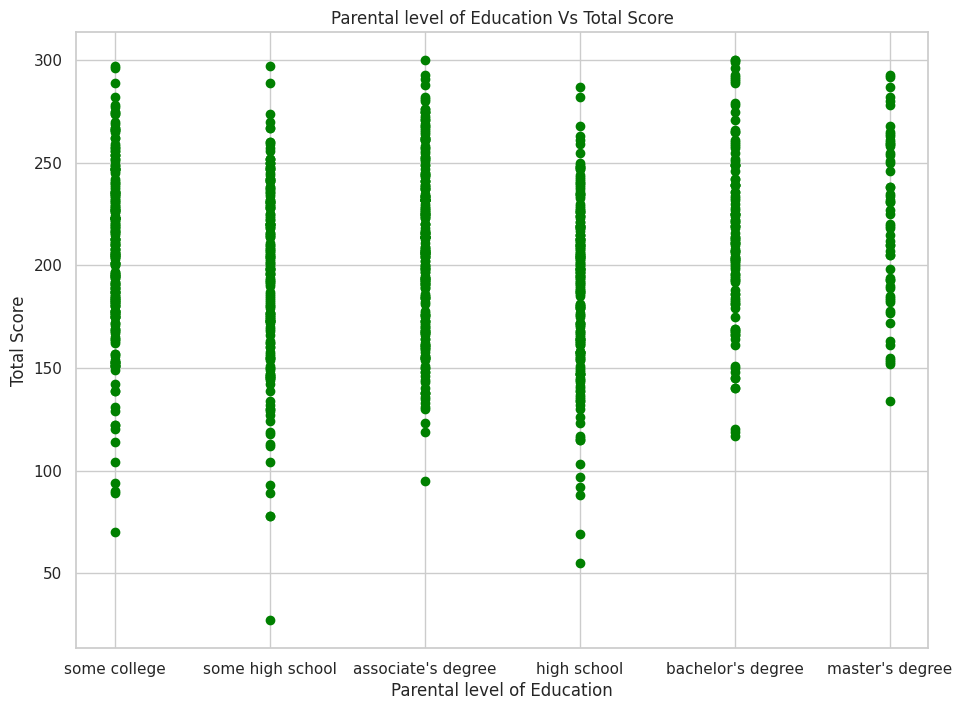

In [84]:
x=data['parental level of education']
Y=data['Total score']
plt.figure(figsize=(11, 8))
plt.scatter(x, Y, c ="green")
plt.xlabel('Parental level of Education')
plt.ylabel('Total Score')
plt.title("Parental level of Education Vs Total Score")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


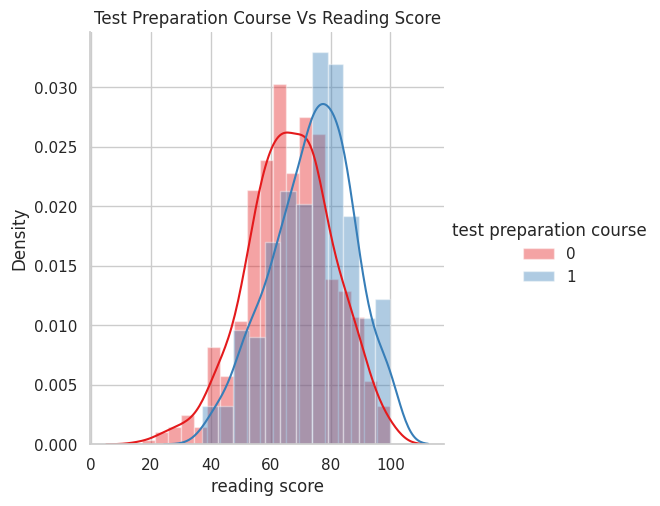

In [85]:
sns.FacetGrid(data, hue = "test preparation course", height=5, palette="Set1").map(sns.distplot, "reading score").add_legend()
plt.title("Test Preparation Course Vs Reading Score")
plt.show()

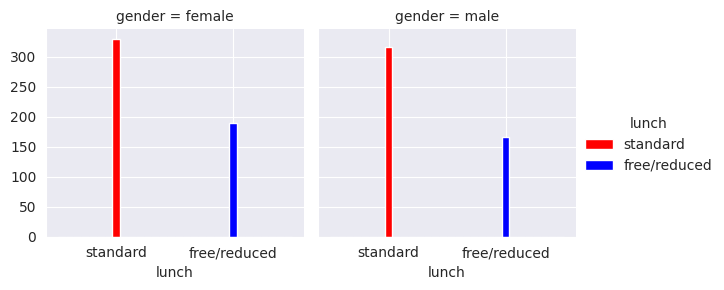

In [37]:
graph = sns.FacetGrid(data, col ='gender',hue_kws={'color': ['r', 'b']}, hue ='lunch')
graph.map(plt.hist, 'lunch', bins = 15).add_legend() # show the object

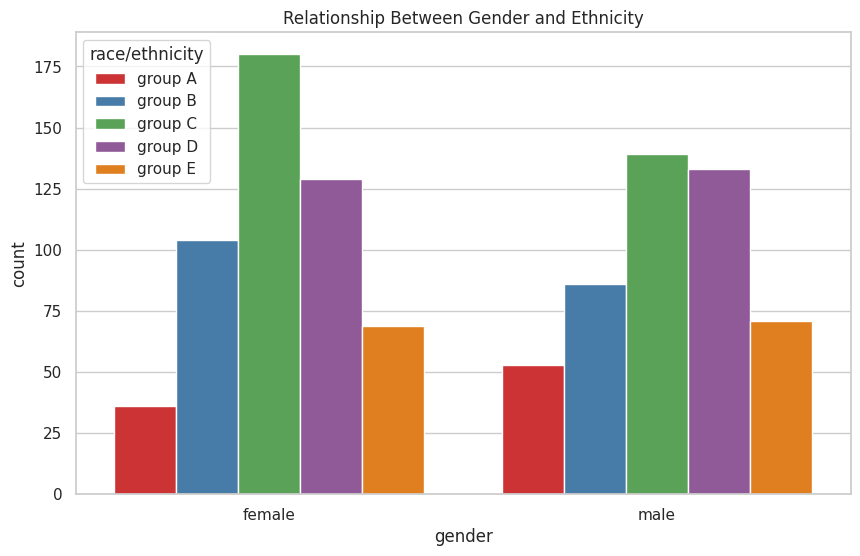

In [63]:
data.sort_values(by='race/ethnicity', inplace=True)
data.reset_index(drop=True, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ethnicity_order = ['group A', 'group B', 'group C', 'group D', 'group E']
sns.countplot(x='gender', hue='race/ethnicity', data=data, palette='Set1')
plt.title('Relationship Between Gender and Ethnicity')
plt.show()


<ipython-input-65-028747afb599>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['gender'], y=data['math score'], ax=axis[0,0], palette=gender_palette)
<ipython-input-65-028747afb599>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['gender'], y=data['reading score'], ax=axis[0,1], palette=gender_palette)
<ipython-input-65-028747afb599>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['gender'], y=data['writing score'], ax=axis[1,0], palette=gender_palette)
<ipython-input-65-028747afb599>:7: FutureWarning: 

Passing `pal

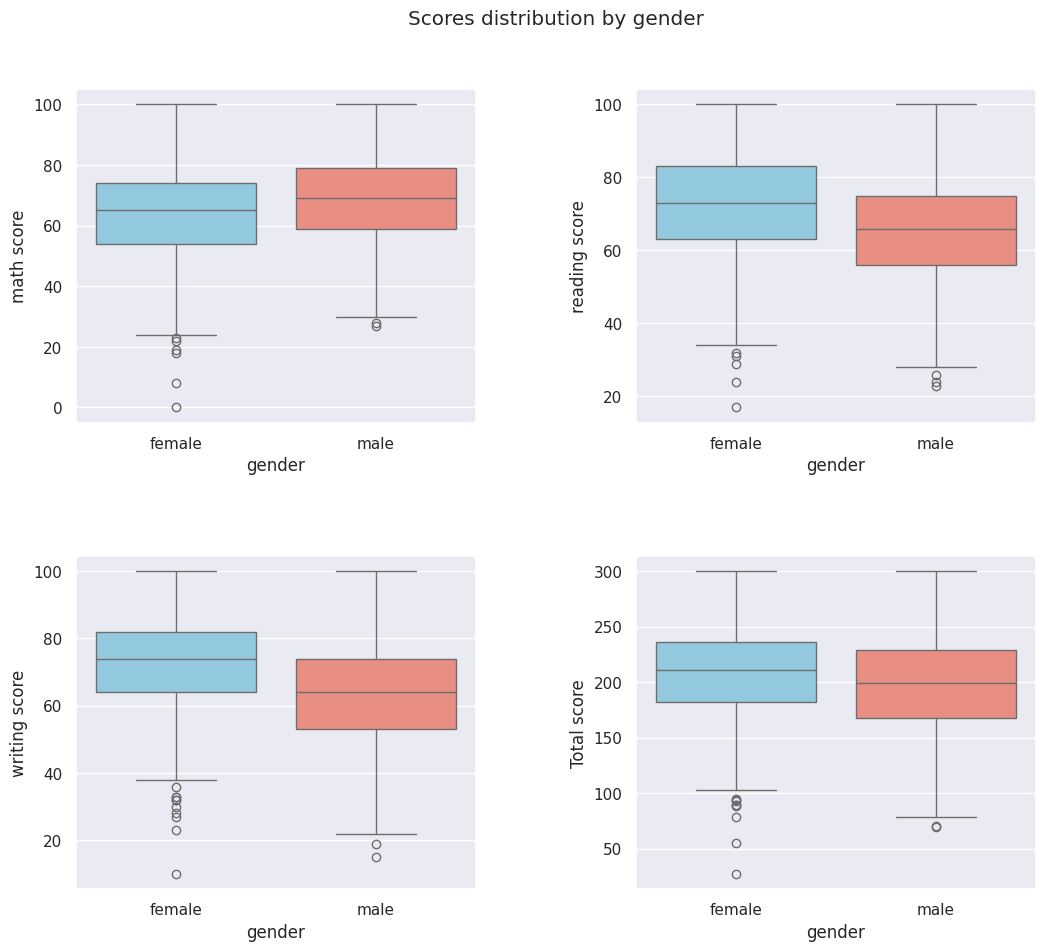

In [65]:
sns.set_style('darkgrid')
figure, axis = plt.subplots(2, 2, figsize=(12, 10))
gender_palette = {'female': 'skyblue', 'male': 'salmon'}
sns.boxplot(x=data['gender'], y=data['math score'], ax=axis[0,0], palette=gender_palette)
sns.boxplot(x=data['gender'], y=data['reading score'], ax=axis[0,1], palette=gender_palette)
sns.boxplot(x=data['gender'], y=data['writing score'], ax=axis[1,0], palette=gender_palette)
sns.boxplot(x=data['gender'], y=data['Total score'], ax=axis[1,1], palette=gender_palette)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Scores distribution by gender')
plt.show()

([<matplotlib.axis.XTick at 0x7939f14414e0>,
 [Text(0.0, 0, 'Female'), Text(1.0, 0, 'Male')])

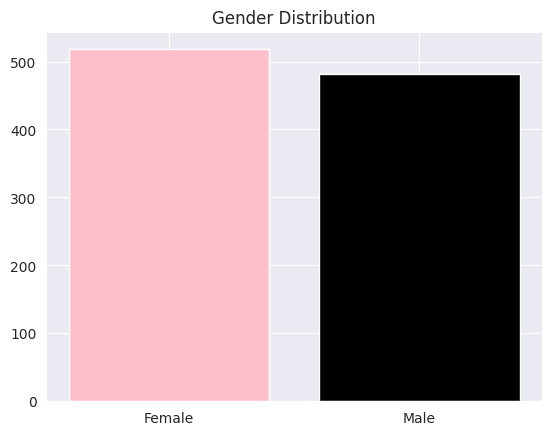

In [39]:
# Examine the gender distribution in the data we gathered.
plt.bar(data['gender'].value_counts().index, data['gender'].value_counts().values, color = ['pink', 'black'])
plt.title('Gender Distribution')
plt.xticks(data['gender'].value_counts().index,['Female','Male'])


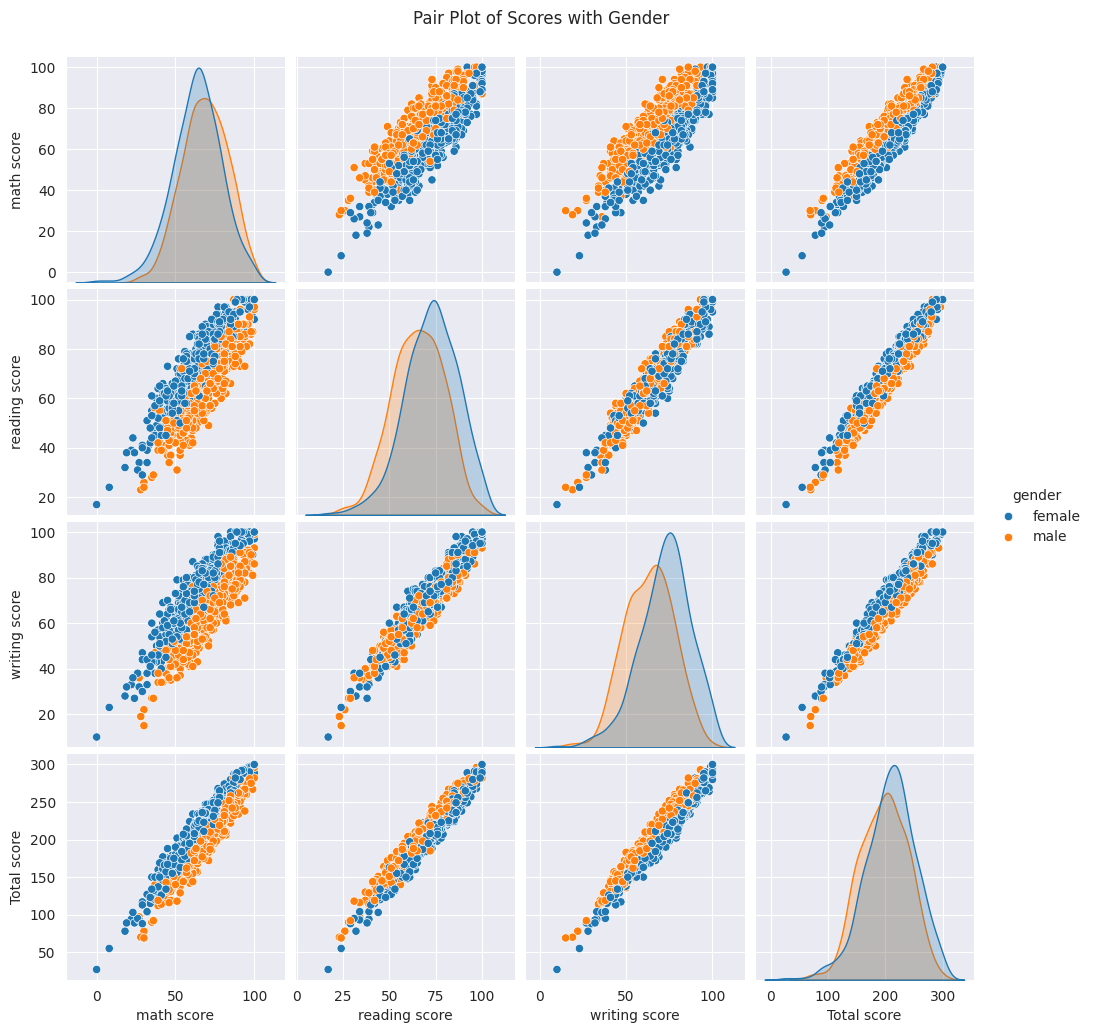

In [44]:
sns.pairplot(data[['math score', 'reading score', 'writing score', 'Total score', 'gender']], hue='gender')
plt.suptitle('Pair Plot of Scores with Gender', y=1.03)
plt.show()